# Overview

1. Getting started
2. `matplotlib`
3. `seaborn`
5. Conclusion

## Interactive plotting libraries
* plotly
* bokeh
* altair

# Getting started

## Imports for today

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import numpy.random as nr

## Simulating data

Today we will be creating some random data based on randomly generated gaussian parameters: a gaussian mixture, a 'control' group, and a 'treatment' group.

In [3]:
# Create a random set of normal distribution parameters: loc (mean), scale (stdev), and size
def random_parameters(n = 3, size = 10000):
    """ Creates n number of random normal parameters
    
    Args:
        n (int): number of random normal parameter sets to make (default: 3)
        size (int): predefined size parameter. Useful in for downstream downsampling (default: 10000)
    
    Returns:
        rand_params (list): contains 3 values per item: loc (mean), scale (stdev), and size
    """
    rand_params = []
    for i in range(n):
        rand_params.append((nr.uniform(-100, 100), nr.rand(), size))
    return rand_params

In [4]:
# Create normal distributions from the above parameters and downsample all three
def gen_sample(dist_params, downsamples = None):
    """ Create random downsampled variables from normal distributions of a given set of parameters
    
    Args:
        dist_params (list of tuples): list of parameters tuples: loc (mean), scale (stdev), and size of normal distribution
        downsamples (list): numbers of downsample sizes. Must be same length as dist_params or None (default: None)
    
    Returns:
        norms (list): length of list determined by number of parameters sets in dist_params. Each item contains a random downsampled set of random variables
    
    Raises:
        AssertionError: if the length of downsample is not the same length as dist_params or is not None 
    """
    norms = []
    if downsamples is None:
        downsamples = [1000] * len(dist_params)
    assert len(downsamples) == len(dist_params), 'dist_params and downsamples must be the same length'
    for i, params in enumerate(dist_params):
        norms.append(nr.choice(nr.normal(*params), downsamples[i]))
    return norms

In [5]:
# Join all three normal random samples into one array
def join_shuf_format(samples, downsample = 1000):
    """ Concatenates sample sets, shuffles them, and return a pd.Series
    
    Args:
        samples (list): each item is a set of normal distribution random samples
        downsample (int): downsample size of concatenated arrays (default: 1000)
    
    Returns:
        (pd.Series): the shuffled version of joined samples
    """
    rs = np.array([])
    for arr in samples:
        rs = np.concatenate((rs, arr))
    rs = nr.choice(rs, downsample)
    nr.shuffle(rs)
    
    return pd.Series(rs)

In [6]:
downsample_max = 1000
rvs = gen_sample(random_parameters(5))

In [7]:
gauss_mix = join_shuf_format(rvs[:3])
control, treatment = [pd.Series(arr) for arr in rvs[3:]]

In [8]:
df = pd.concat([gauss_mix, control, treatment], axis=1, ignore_index=True)
df.columns=['gauss_mix', 'control', 'treatment']

In [9]:
df.tail()

,gauss_mix,control,treatment
995,-49.989610,-92.417164,-99.681639
996,87.846169,-91.648263,-99.501487
997,-50.744093,-93.471255,-99.680509
998,-50.304026,-93.038338,-98.955225
999,87.773672,-92.360714,-99.026891


# `matplotlib`

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

Because we used a notebook magic (`%`) for `matplotlib`, anything we plot with it will render in our environment.

## `matplotlib` format strings

`matplotlib` can use *format strings* to quickly declare the type of plots you want. Here are *some* of those formats:

|**Character**|**Description**|
|:-----------:|:--------------|
|'--'|Dashed line|
|':'|Dotted line|
|'o'|Circle marker|
|'^'|Upwards triangle marker|
|'b'|Blue|
|'c'|Cyan|
|'g'|Green|

## From scratch

The main usage of `plt` is the `plot()` and `show()` functions

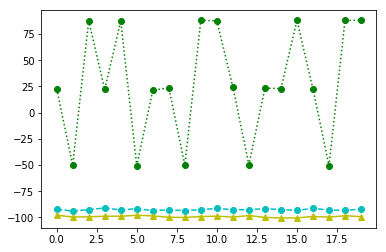

In [16]:
plt.plot(df.gauss_mix[:20], ':og')
plt.plot(df.control[:20], 'c--o')
plt.plot(df.treatment[:20], 'y-^')
plt.show()

## Multiple Plots

`matplotlib` allows users to define the regions of their plotting canvas. If the user intends to create a canvas with multiple plots, they would use the `subplot()` function. The `subplot` function sets the number of rows and columns the canvas will have **AND** sets the current index of where the next subplot will be rendered.

In [18]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes at the given grid position.
    
    Call signature::
    
       subplot(nrows, ncols, index, **kwargs)
    
    In the current figure, create and return an `~matplotlib.axes.Axes`,
    at position *index* of a (virtual) grid of *nrows* by *ncols* axes.
    Indexes go from 1 to ``nrows * ncols``, incrementing in row-major order.
    
    If *nrows*, *ncols* and *index* are all less than 10, they can also be
    given as a single, concatenated, three-digit number.
    
    For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
    `matplotlib.axes.Axes` at the top right corner of the current figure,
    occupying half of the figure height and a third of the figure width.
    
    .. note::
    
       Creating a subplot will delete any pre-existing subplot that overlaps
       with it beyond sharing a boundary::
    
          import matplotlib.pyplot as plt
        

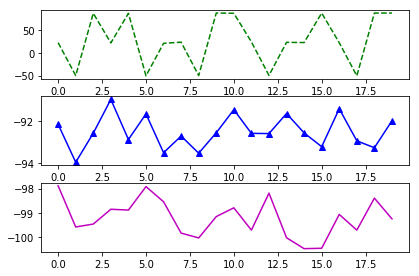

In [17]:
fig, ax1, ax2, ax3 = plt.suplots()

# Plot all three columns from df in different subplots
# Rows first index (top-left)
plt.subplot(311)
plt.plot(df.gauss_mix[:20], 'g--')


plt.subplot(312)
plt.plot(df.control[:20], 'b-^')

plt.subplot(313)
plt.plot(df.treatment[:20], 'm')

# Some plot configuration
plt.subplots_adjust(top=.92, bottom=.08, left=.1, right=.95, hspace=.25, wspace=.35)

ax1.xlabel()

plt.show()

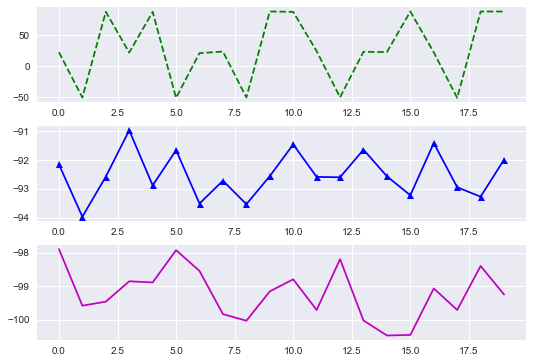

In [23]:
# Temporary styles
with plt.style.context('seaborn'):
    plt.figure(1)

    # Plot all three columns from df in different subplots
    # Rows first index (top-left)
    plt.subplot(311)
    plt.plot(df.gauss_mix[:20], 'g--')

    plt.subplot(312)
    plt.plot(df.control[:20], 'b-^')

    plt.subplot(313)
    plt.plot(df.treatment[:20], 'm')

    # Some plot configuration
    plt.subplots_adjust(top=.92, bottom=.08, left=.1, right=.95, hspace=.25, wspace=.35)
    plt.show()

## Histogram

Text(0,0.5,'freq')

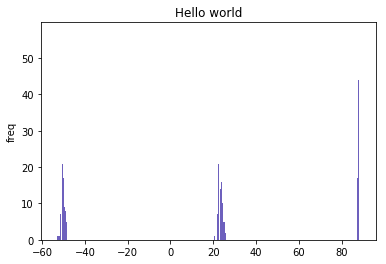

In [27]:
n, bins, patches = plt.hist(df.gauss_mix, bins=1000, facecolor='#4838AD', alpha=0.8, rwidth=.8, align='mid')

# Add a title
plt.title('Hello world')

# Add y axis label
plt.ylabel('freq')


The biggest issue with `matplotlib` isn't its lack of power...it is that it is too much power. With great power, comes great responsibility. When you are quickly exploring data, you don't want to have to fiddle around with axis limits, colors, figure sizes, etc. Yes, you *can* make good figures with `matplotlib`, but you probably won't.

## Using pandas `.plot()`

Pandas abstracts some of those initial issues with data visualization. However, it is still `matplotlib`-esque.</br></br>
Pandas is built off of `numpy` for its caclulations, but its plotting is built off of `matplotlib`. Therefore, just like any data you get from `pandas` can be used within `numpy`, every plot that is returned from `pandas` is a `matplotlib` plot...and subject to `matplotlib` modification.

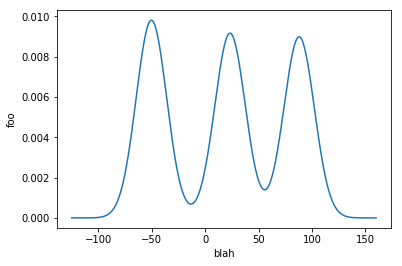

In [29]:
# Density plot
ax = df.gauss_mix.plot.density()

# title and axis_labels
plt.xlabel('blah')
plt.ylabel('foo')
plt.show()

# Seaborn

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. There was a brief introduction to seaborn in the last class, which we will re-create here.

In [31]:
import seaborn as sns

`seaborn` lets users *style* their plotting environment.

In [32]:
sns.set(style='whitegrid')

However, you can always use `matplotlib`'s `plt.style`

### New data

In [33]:
weather = pd.read_table('./datasets/weather.tsv')

In [34]:
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF2,WSF5,WSFG,WT01,WT02,WT03,WT04,WT06,WT08,WT11
0,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1MIWS0042,ANN ARBOR 4.5 W\t MI US,42.2781,-83.8188,278.6,2017-08-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Violin plot

Fancier box plot that gets rid of the need for 'jitter' to show the inherent distribution of the data points

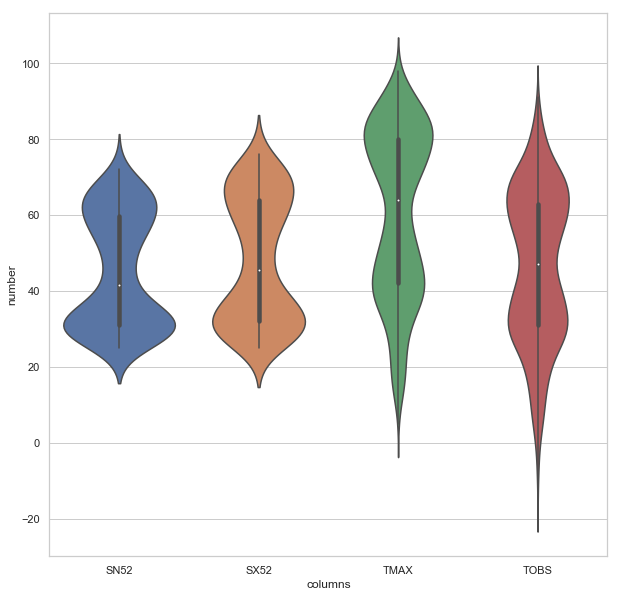

In [35]:
wanted_columns = ['SN52', 'SX52', 'TMAX', 'TOBS']

fig, axes = plt.subplots(figsize=(10, 10))
sns.violinplot(data=weather.loc[:,wanted_columns], ax=axes)
axes.set_ylabel('number')
axes.set_xlabel('columns')
plt.show()

## Distplot

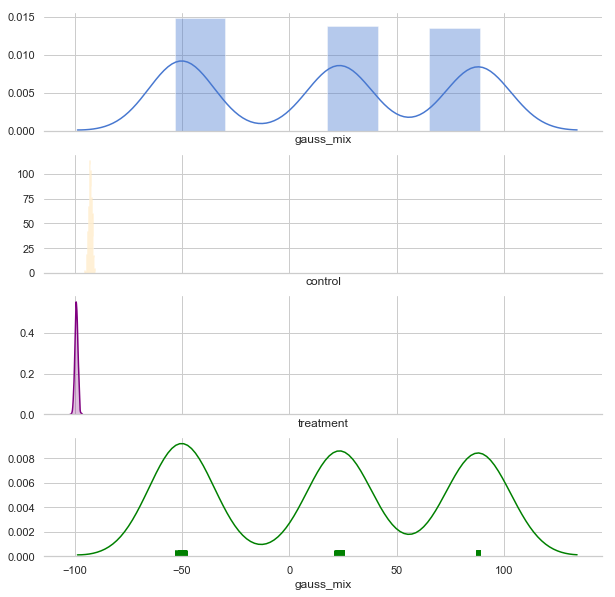

In [39]:
sns.set(style='whitegrid', palette='muted')

# 1 row, 3 columns
f, axes = plt.subplots(4,1, figsize=(10,10), sharex=True)
sns.despine(left=True)

# Regular displot
sns.distplot(df.gauss_mix, ax=axes[0])

# Change the color
sns.distplot(df.control, kde=False, ax=axes[1], color='orange')

# Show the Kernel density estimate
sns.distplot(df.treatment, hist=False, kde_kws={'shade':True}, ax=axes[2], color='purple')

# Show the rug
sns.distplot(df.gauss_mix, hist=False, rug=True, ax=axes[3], color='green')

## Hexbin with marginal distributions

In [40]:
sns.set(style='ticks', palette='muted')

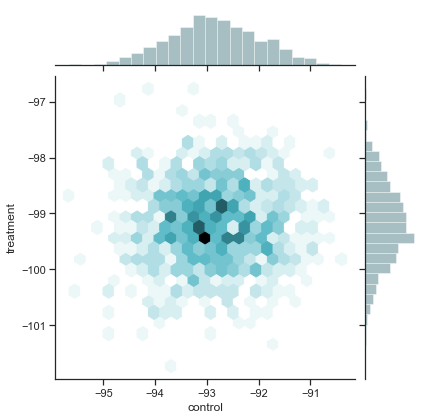

In [41]:
plots_to_join = [df.control, df.treatment]
sns.jointplot(*plots_to_join, kind='hex', color= '#246068')

## FacetGrid

In [42]:
real_estate = pd.read_csv('./datasets/real_estate.csv')

In [43]:
real_estate.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


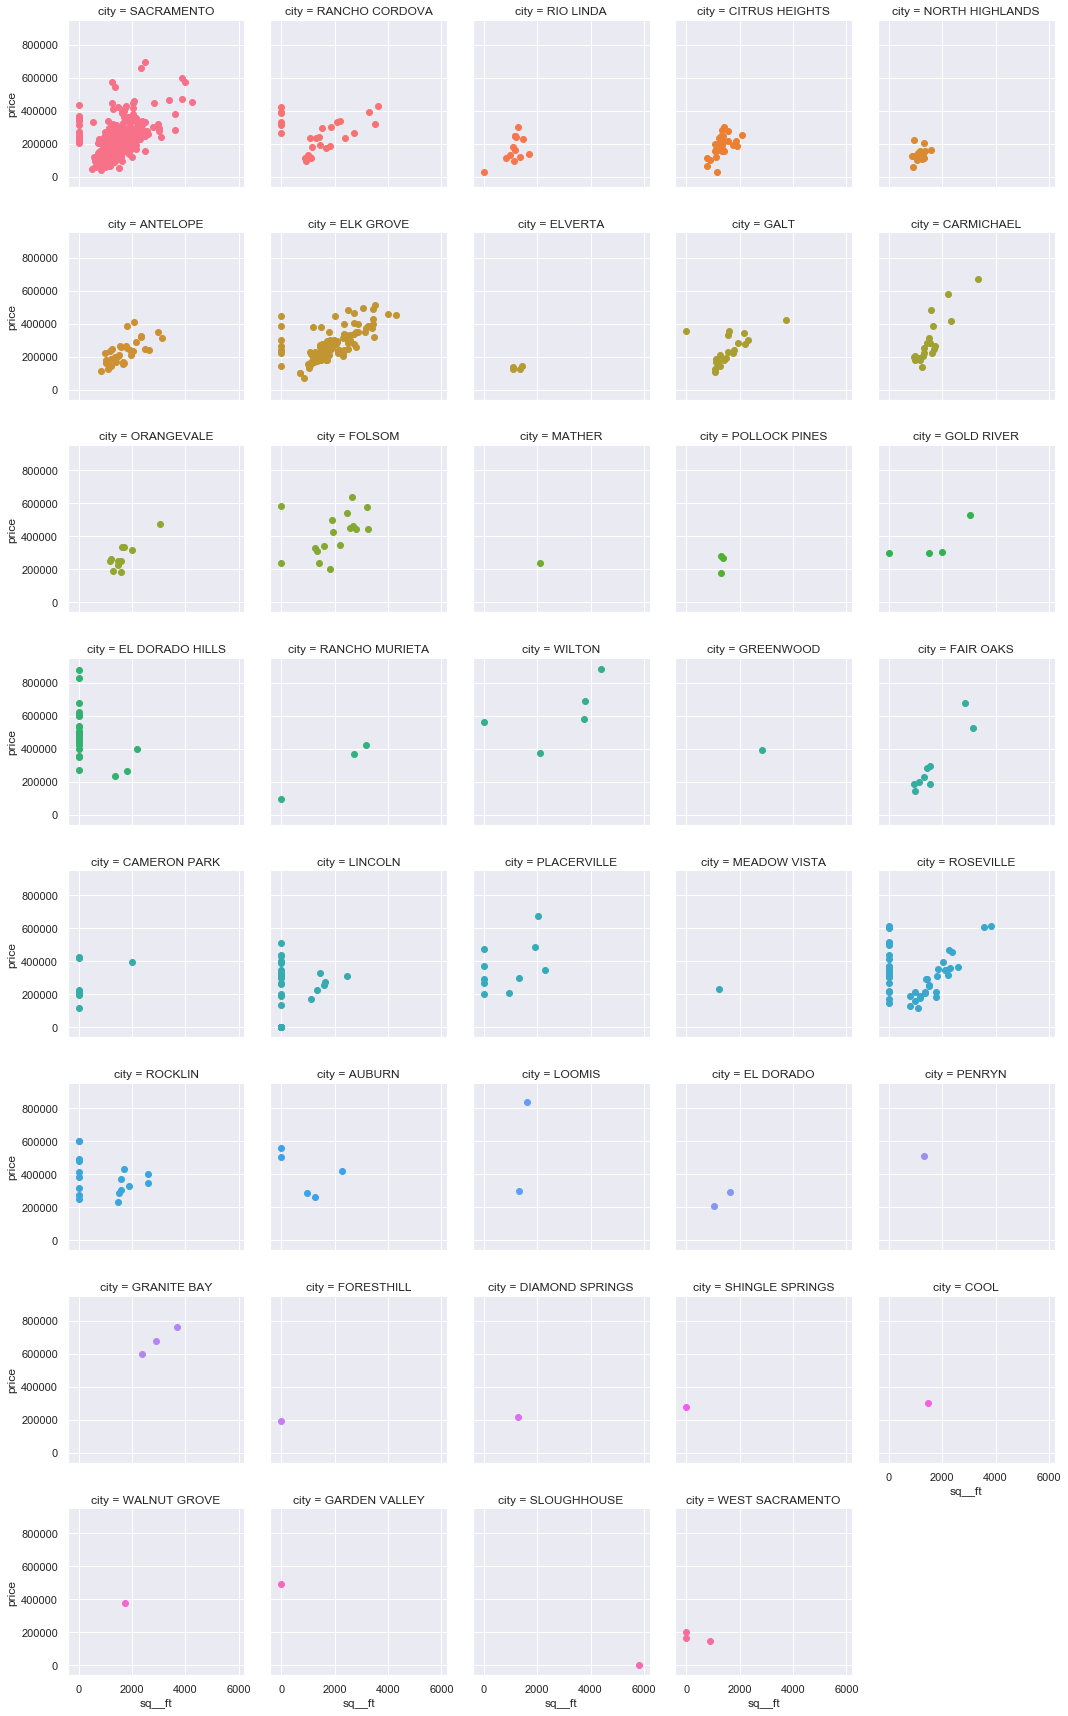

In [44]:
sns.set()
columns_wanted = ['city', 'sq__ft', 'price']
important_column = 'city'
g = sns.FacetGrid(real_estate.loc[:,columns_wanted], col=important_column, hue=important_column, col_wrap=5)
g.map(plt.scatter, 'sq__ft', 'price')